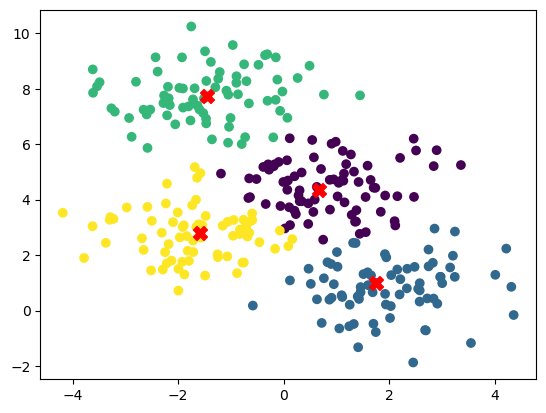

In [2]:
from sklearn.metrics import pairwise_distances
import numpy as np

def k_medoids(X, k, max_iters=100):
    n_samples, n_features = X.shape

    # Randomly initialize k medoids as data points
    medoids = X[np.random.choice(n_samples, k, replace=False)]

    for _ in range(max_iters):
        # Calculate the pairwise distances between data points and medoids
        distances = pairwise_distances(X, medoids, metric='euclidean')

        # Find the nearest medoid for each data point
        labels = np.argmin(distances, axis=1)

        # Update medoids
        new_medoids = np.copy(medoids)
        for i in range(k):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                new_medoids[i] = cluster_points[np.argmin(np.sum(pairwise_distances(cluster_points, cluster_points), axis=1))]

        # Check for convergence
        if np.all(new_medoids == medoids):
            break

        medoids = new_medoids

    return medoids, labels

# Example usage
if __name__ == "__main__":
    from sklearn.datasets import make_blobs
    import matplotlib.pyplot as plt

    # Generate synthetic data
    X, _ = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)

    # Apply k-medoids
    k = 4
    medoids, labels = k_medoids(X, k)

    # Plot the results
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.scatter(medoids[:, 0], medoids[:, 1], c='red', s=100, marker='X')
    plt.show()
